In [319]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score

In [3]:
#raw = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv')

/Users/jli/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# pickle save the raw file
'''
with open('raw', 'wb') as to_write:
    pickle.dump(raw, to_write)
'''
    
'''
with open('raw','rb') as read_file:
    raw = pickle.load(read_file)
'''

In [5]:
raw.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AR,5.0,BOONE,5009.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
1,2021-10,MO,29.0,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
2,2020-10,MO,29.0,CASS,29037.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47.0,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-11,GA,13.0,EFFINGHAM,13103.0,0 - 17 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN


In [12]:
raw.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [13]:
raw.case_month.unique()

array(['2020-12', '2021-10', '2020-10', '2021-08', '2020-11', '2021-04',
       '2021-09', '2021-01', '2020-09', '2020-07', '2021-02', '2020-06',
       '2020-08', '2021-07', '2021-03', '2021-05', '2021-06', '2020-05',
       '2020-04', '2020-03', '2020-02', '2020-01', nan], dtype=object)

In [397]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37532072 entries, 0 to 37532071
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

In [16]:
# Filter on the records for August to October 2021
aug_oct_2021 = raw[(raw['case_month'] == '2021-10') |
                   (raw['case_month'] == '2021-09') |
                   (raw['case_month'] == '2021-08')]

In [20]:
# Pickle save the Aug to Oct 2021 file
with open('aug_oct_2021', 'wb') as to_write:
    pickle.dump(aug_oct_2021, to_write)

In [21]:
aug_oct_2021.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
1,2021-10,MO,29.0,PHELPS,29161.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
3,2021-08,TN,47.0,CLAIBORNE,47025.0,0 - 17 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
7,2021-09,MN,27.0,BECKER,27005.0,18 to 49 years,Female,Unknown,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
14,2021-09,WI,55.0,SHAWANO,55115.0,50 to 64 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,NaN
16,2021-09,CO,8.0,MONTEZUMA,8083.0,65+ years,Female,Missing,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN


In [162]:
# Select relevant columns to analysis
df = aug_oct_2021[['res_state', 'state_fips_code', 'age_group', 'sex', 'race', 'exposure_yn',
                   'symptom_status', 'underlying_conditions_yn', 'hosp_yn']]

In [163]:
df.hosp_yn.unique()

array(['Unknown', 'Missing', 'No', 'Yes'], dtype=object)

In [164]:
df.head()

,res_state,state_fips_code,age_group,sex,race,exposure_yn,symptom_status,underlying_conditions_yn,hosp_yn
1,MO,29.0,0 - 17 years,NaN,NaN,Missing,Missing,NaN,Unknown
3,TN,47.0,0 - 17 years,Female,Missing,Missing,Missing,NaN,Missing
7,MN,27.0,18 to 49 years,Female,Unknown,Missing,Missing,NaN,Missing
14,WI,55.0,50 to 64 years,Female,NaN,Missing,Symptomatic,NaN,No
16,CO,8.0,65+ years,Female,Missing,Missing,Symptomatic,NaN,Missing


In [158]:
# Map US states to 4 regions
state_mapping = pd.read_excel('state-geocodes-v2020.xlsx', skiprows=5)

/Users/jli/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [166]:
state_mapping.head()

,Region,Division,State (FIPS),Name
0,1,0,0,Northeast Region
1,1,1,0,New England Division
2,1,1,9,Connecticut
3,1,1,23,Maine
4,1,1,25,Massachusetts


In [169]:
df_region = df.merge(state_mapping[['Region', 'State (FIPS)']], how='left', left_on='state_fips_code', right_on='State (FIPS)')

In [170]:
df_region.head()

,res_state,state_fips_code,age_group,sex,race,exposure_yn,symptom_status,underlying_conditions_yn,hosp_yn,Region,State (FIPS)
0,MO,29.0,0 - 17 years,NaN,NaN,Missing,Missing,NaN,Unknown,2.0,29.0
1,TN,47.0,0 - 17 years,Female,Missing,Missing,Missing,NaN,Missing,3.0,47.0
2,MN,27.0,18 to 49 years,Female,Unknown,Missing,Missing,NaN,Missing,2.0,27.0
3,WI,55.0,50 to 64 years,Female,NaN,Missing,Symptomatic,NaN,No,2.0,55.0
4,CO,8.0,65+ years,Female,Missing,Missing,Symptomatic,NaN,Missing,4.0,8.0


In [174]:
# dropping rows with NaN in any columns
df_region_dropna = df_region.dropna(axis=0)

In [176]:
df_region_dropna.Region.value_counts(dropna=False)

3.0    82397
2.0    65554
4.0    47792
1.0    34821
Name: Region, dtype: int64

In [179]:
df_region_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230564 entries, 75 to 7928445
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   res_state                 230564 non-null  object 
 1   state_fips_code           230564 non-null  float64
 2   age_group                 230564 non-null  object 
 3   sex                       230564 non-null  object 
 4   race                      230564 non-null  object 
 5   exposure_yn               230564 non-null  object 
 6   symptom_status            230564 non-null  object 
 7   underlying_conditions_yn  230564 non-null  object 
 8   hosp_yn                   230564 non-null  object 
 9   Region                    230564 non-null  float64
 10  State (FIPS)              230564 non-null  float64
dtypes: float64(3), object(8)
memory usage: 21.1+ MB


## Now let's do some feature engineering

In [180]:
# Keep only 'yes' and 'no' for hospitalization column
clean_df = df_region_dropna[(df_region_dropna['hosp_yn'] == 'Yes') | (df_region_dropna['hosp_yn'] == 'No')]

In [181]:
clean_df.hosp_yn.value_counts()

No     156080
Yes     25793
Name: hosp_yn, dtype: int64

In [182]:
clean_df.reset_index(drop=True, inplace=True)
clean_df.head()

,res_state,state_fips_code,age_group,sex,race,exposure_yn,symptom_status,underlying_conditions_yn,hosp_yn,Region,State (FIPS)
0,AR,5.0,18 to 49 years,Female,White,Missing,Symptomatic,Yes,No,3.0,5.0
1,OH,39.0,18 to 49 years,Female,Black,Missing,Symptomatic,Yes,No,2.0,39.0
2,TN,47.0,18 to 49 years,Male,Unknown,Yes,Symptomatic,Yes,No,3.0,47.0
3,NC,37.0,0 - 17 years,Female,Multiple/Other,Unknown,Symptomatic,Yes,No,3.0,37.0
4,FL,12.0,18 to 49 years,Female,White,Missing,Symptomatic,Yes,No,3.0,12.0


In [185]:
# Feature Engineering
#clean_df.dropna(axis=0, subset=['res_state', 'age_group', 'sex'], inplace=True)
clean_df = clean_df[clean_df.age_group != 'Missing']
clean_df = clean_df[(clean_df.sex != 'Missing') & (clean_df.sex != 'Unknown')]
clean_df['race'].replace(['Unknown', 'Missing', np.nan], 'Other', inplace=True)
clean_df['exposure_yn'].replace(['Unknown', 'Missing', np.nan], 'Other', inplace=True)
clean_df['symptom_status'].replace(['Unknown', 'Missing', np.nan], 'Other', inplace=True)
clean_df['underlying_conditions_yn'].replace(['Unknown', 'Missing', np.nan], 'Other', inplace=True)

In [186]:
clean_df.age_group.value_counts(dropna=False)

18 to 49 years    81287
65+ years         37642
50 to 64 years    36995
0 - 17 years      25534
Name: age_group, dtype: int64

In [187]:
clean_df.sex.value_counts(dropna=False)

Female    104837
Male       76621
Name: sex, dtype: int64

In [188]:
clean_df.race.value_counts(dropna=False)

White                                     143891
Black                                      19918
Other                                      10535
Multiple/Other                              4328
Asian                                       1560
American Indian/Alaska Native                721
Native Hawaiian/Other Pacific Islander       505
Name: race, dtype: int64

In [189]:
clean_df.exposure_yn.value_counts(dropna=False)

Other    118394
Yes       63064
Name: exposure_yn, dtype: int64

In [190]:
clean_df.symptom_status.value_counts(dropna=False)

Symptomatic     170379
Other             6152
Asymptomatic      4927
Name: symptom_status, dtype: int64

In [191]:
clean_df.underlying_conditions_yn.value_counts(dropna=False)

Yes    174955
No       6503
Name: underlying_conditions_yn, dtype: int64

# Preprocessing for categorical columns - One Hot Encoder

In [215]:
clean_df['hosp_yn'].replace('Yes', 1, inplace=True)
clean_df['hosp_yn'].replace('No', 0, inplace=True)

In [254]:
clean_df.head()

,res_state,state_fips_code,age_group,sex,race,exposure_yn,symptom_status,underlying_conditions_yn,hosp_yn,Region,State (FIPS)
0,AR,5.0,18 to 49 years,Female,White,Other,Symptomatic,Yes,0,3.0,5.0
1,OH,39.0,18 to 49 years,Female,Black,Other,Symptomatic,Yes,0,2.0,39.0
2,TN,47.0,18 to 49 years,Male,Other,Yes,Symptomatic,Yes,0,3.0,47.0
3,NC,37.0,0 - 17 years,Female,Multiple/Other,Other,Symptomatic,Yes,0,3.0,37.0
4,FL,12.0,18 to 49 years,Female,White,Other,Symptomatic,Yes,0,3.0,12.0


In [276]:
X = clean_df[['Region', 'age_group', 'sex', 'race', 'exposure_yn',
             'symptom_status', 'underlying_conditions_yn']]
y = clean_df['hosp_yn']

In [277]:
# Create the encoder
encoder = OneHotEncoder(handle_unknown="ignore")

# Apply the encoder on selected columns
X_encoded = encoder.fit_transform(X[['age_group', 'sex', 'race', 'exposure_yn',
                                     'symptom_status', 'underlying_conditions_yn']])

In [393]:
# Get the columns names after applying the encoder
column_name = encoder.get_feature_names(['age_group', 'sex', 'race', 'exposure_yn',
                           'symptom_status', 'underlying_conditions_yn'])
#column_name

In [395]:
#one_hot_encoded_frame =  pd.DataFrame(X_encoded.todense(), columns= column_name)
#one_hot_encoded_frame.head()

# Start training

In [345]:
#X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_frame, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Baseline probability

In [346]:
np.mean(y_train)

0.1423198269567254

## Start with a simple decision tree classifier

In [406]:
decisiontree = DecisionTreeClassifier(max_depth=3)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [407]:
print('Accuracy (train): ', decisiontree.score(X_train, y_train))
print('Accuracy (test) : ', decisiontree.score(X_test, y_test))

Accuracy (train):  0.859918989295014
Accuracy (test) :  0.8623112531687425


## Notice that the accuracy is almost entirely due to our tree classifies all records to "Not Hospitalized"

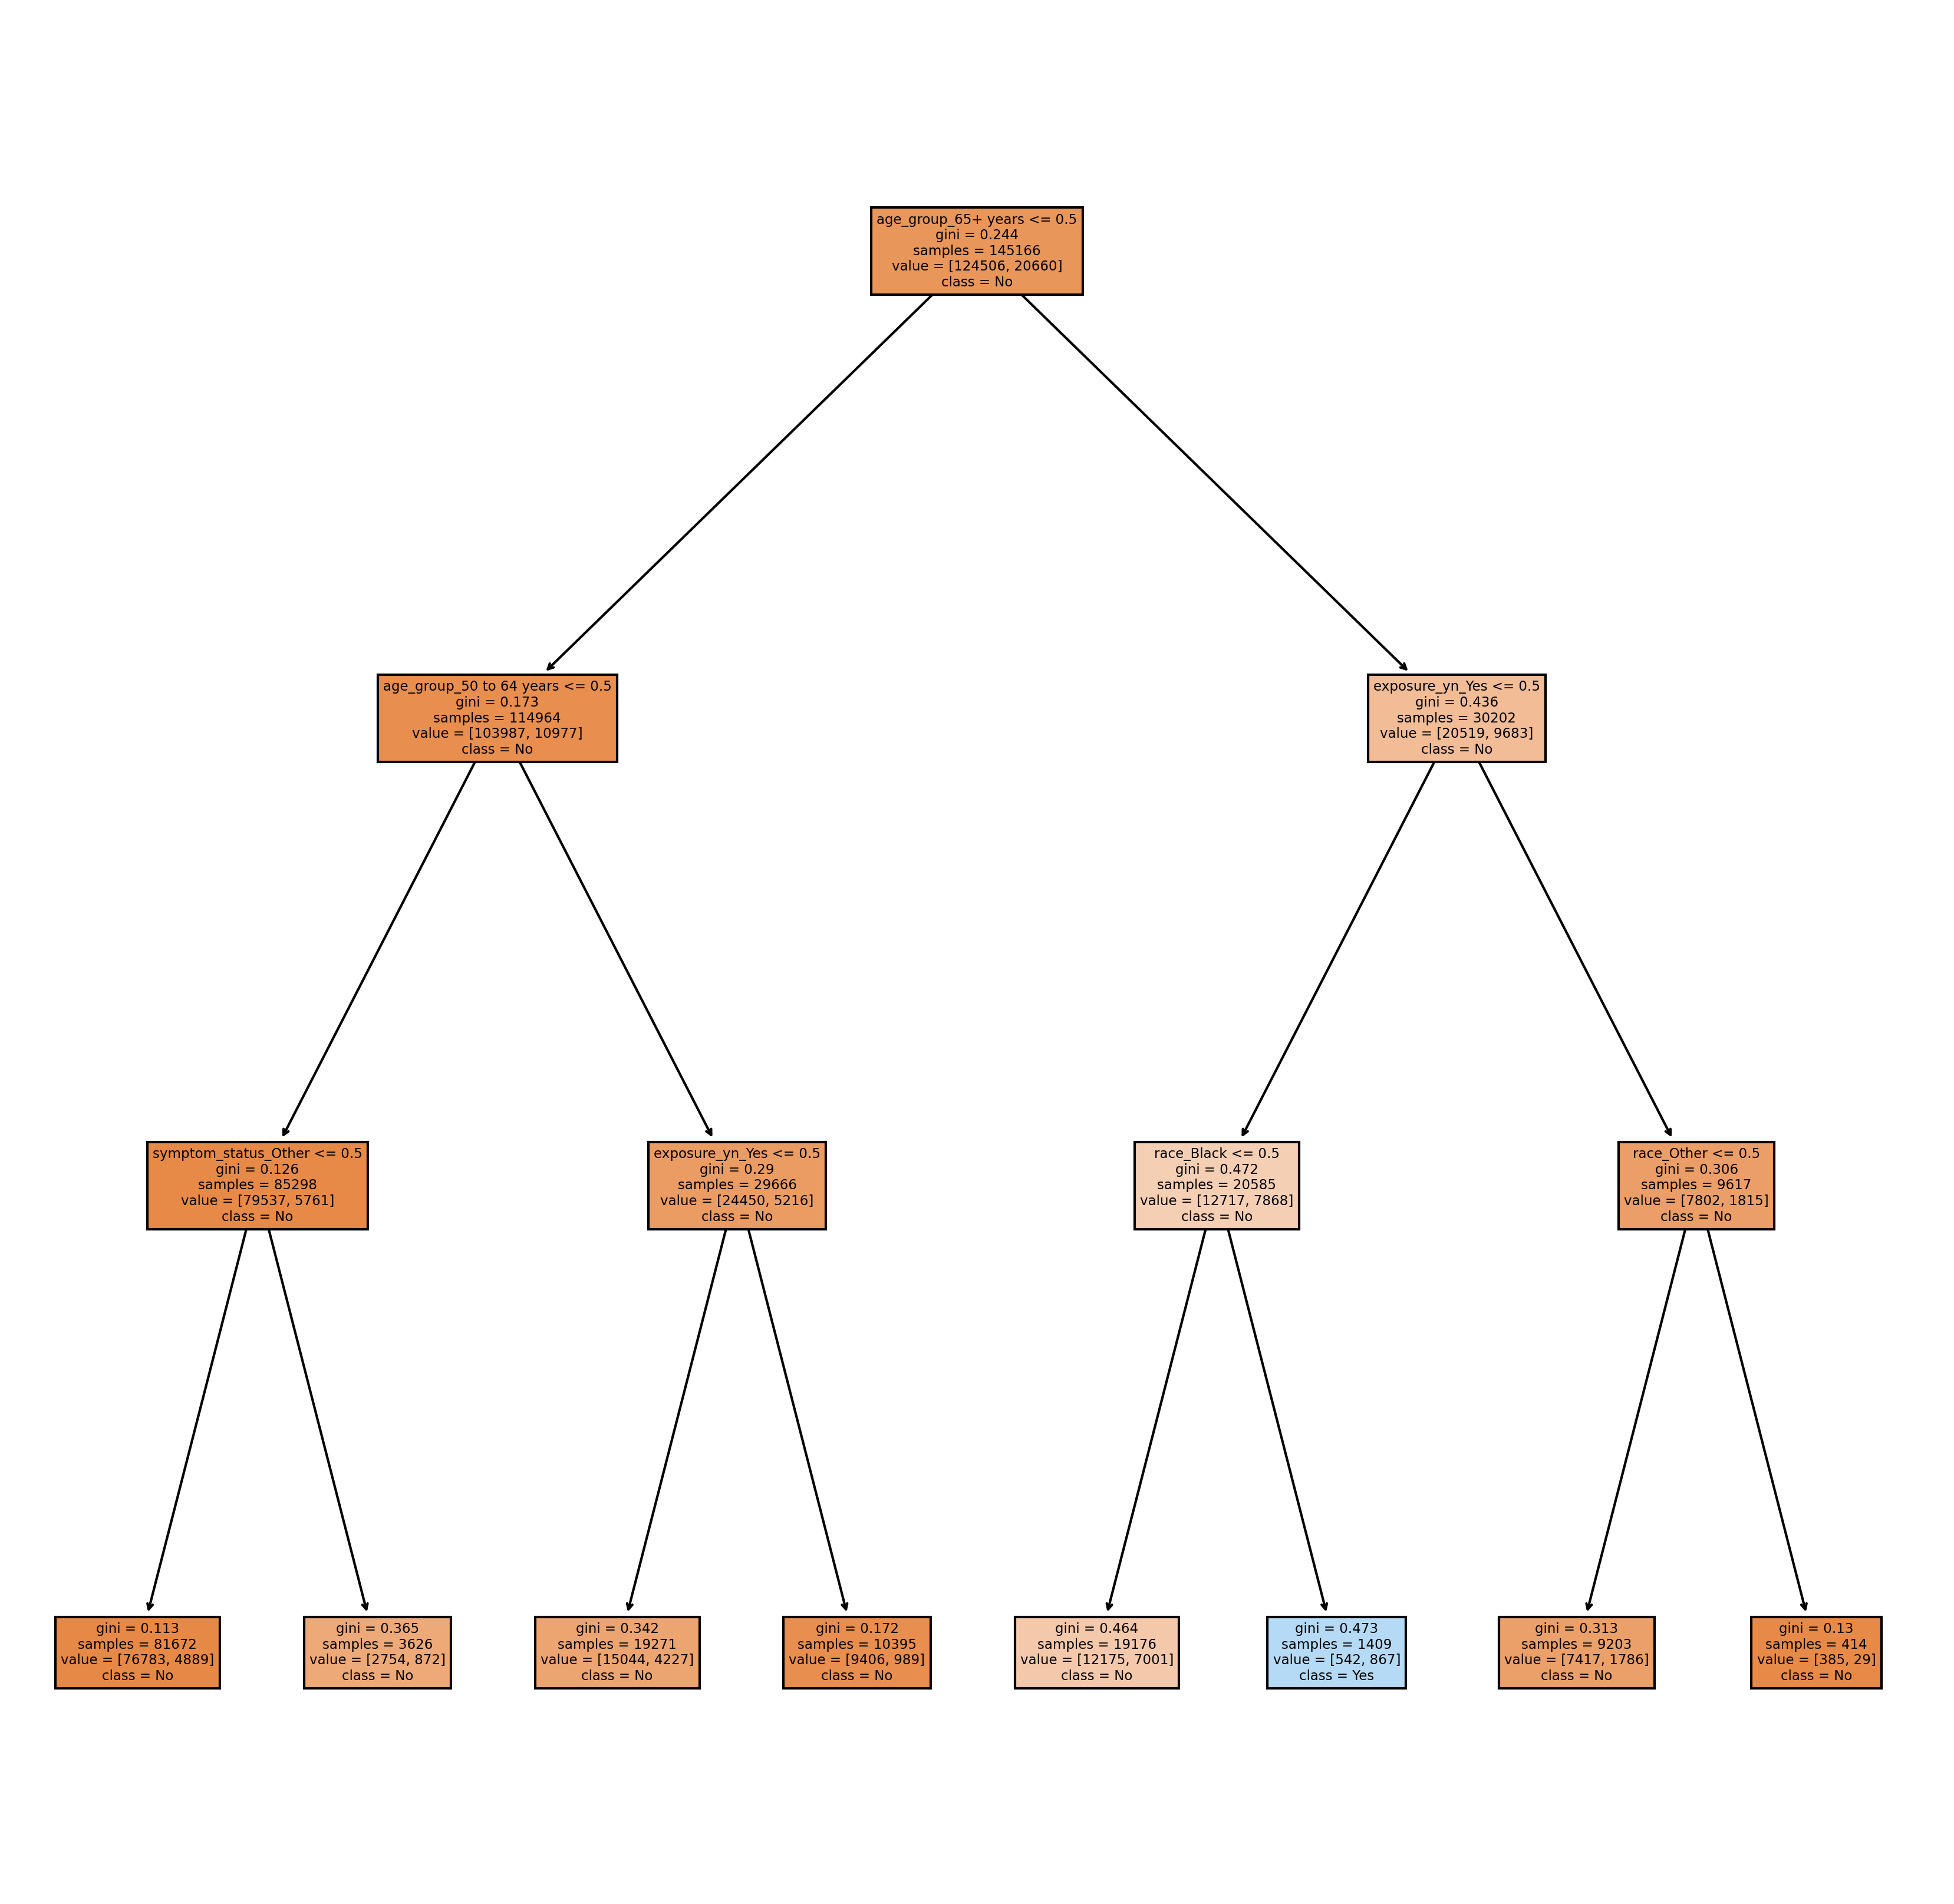

In [408]:
# Visualize the simple tree
fig, axes = plt.subplots(figsize = (14,14), dpi=300)
plot_tree(decisiontree, feature_names=column_name, class_names=['No', 'Yes'], filled=True);
fig.savefig("decistion_tree.png")

In [409]:
y_predict = decisiontree.predict(X_test)
pd.DataFrame(y_test).value_counts()

hosp_yn
0          31209
1           5083
dtype: int64

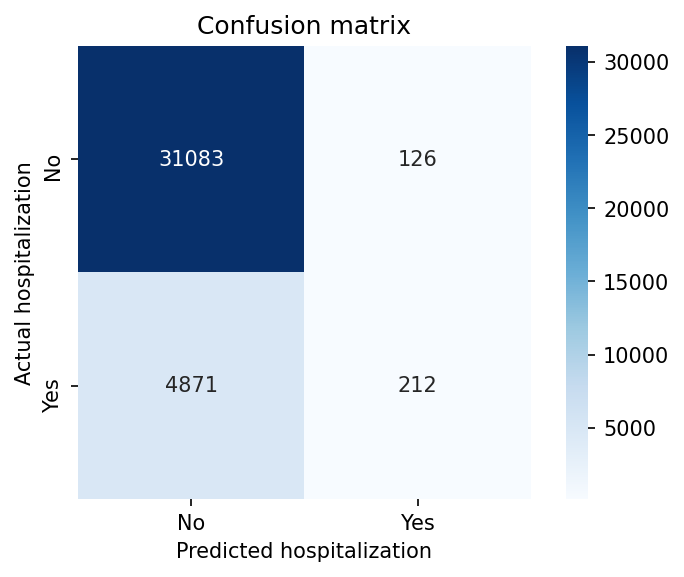

In [410]:
# Print confusion matrix
confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=150)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted hospitalization')
plt.ylabel('Actual hospitalization')
plt.title('Confusion matrix');

In [411]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print('F1 score:  {:6.4f}'.format(f1_score(y_test, y_predict)))

Precision: 0.6272,   Recall: 0.0417
F1 score:  0.0782


Recall score is bad due to the same reason - our tree classifies almost all records to "negative".

# At this point, clearly we need to implement some class imbalance solutions